In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import jax.numpy as jnp

import seaborn as sns
sns.set_context('paper', font_scale = 1.5)
sns.color_palette('colorblind')
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

import h5py

import corner

#for calculating rates from GC models
import GC_rates

In [2]:
def summary_statistics(post):
    x = np.median(post)
    p = np.percentile(post, 95) - x
    m = x - np.percentile(post, 5)
    s = '%.1f^{+%.1f}_{-%.1f}'%(x, p, m)
    return s

In [3]:
GC_data = GC_rates.read_data()

In [4]:
numsim, rvv, zb, ncll, tgw = GC_data

In [5]:
ncl = np.unique(ncll)
print(ncl)

[ 200000.  400000.  800000. 1600000.]


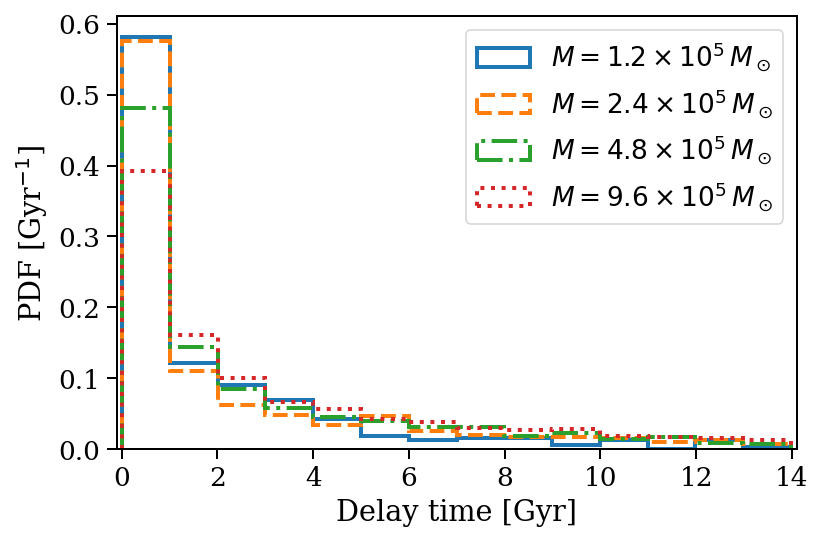

In [6]:
labels = [r'$M = 1.2\times10^5\,M_\odot$', r'$ M = 2.4\times10^5\,M_\odot$', r'$M = 4.8\times10^5\,M_\odot$', r'$M = 9.6\times10^5\,M_\odot$']

bins = np.linspace(min(tgw), max(tgw), 15)

plt.hist(tgw[(ncll == ncl[0])], color = sns.color_palette()[0], linewidth = 2.0, ls = '-', label = labels[0], bins = bins, cumulative = False, density = True, histtype = 'step')
plt.hist(tgw[(ncll == ncl[1])], color = sns.color_palette()[1], linewidth = 2.0, ls = '--', label = labels[1], bins = bins, cumulative = False, density = True, histtype = 'step')
plt.hist(tgw[(ncll == ncl[2])], color = sns.color_palette()[2], linewidth = 2.0, ls = '-.', label = labels[2], bins = bins, cumulative = False, density = True, histtype = 'step')
plt.hist(tgw[(ncll == ncl[3])], color = sns.color_palette()[3], linewidth = 2.0, ls = ':', label = labels[3], bins = bins, cumulative = False, density = True, histtype = 'step')


#plt.axvline(np.median(tgw[(ncll == ncl[0])]), color = sns.color_palette()[4], ls = '-')
#plt.axvline(np.median(tgw[(ncll == ncl[1])]), color = sns.color_palette()[4], ls = '--')
#plt.axvline(np.median(tgw[(ncll == ncl[2])]), color = sns.color_palette()[4], ls = '-.')
#plt.axvline(np.median(tgw[(ncll == ncl[3])]), color = sns.color_palette()[4], ls = ':')





plt.legend(loc = 'best')

plt.xlim(-0.1, 14.1)
plt.xlabel('Delay time [Gyr]')
plt.ylabel(r'PDF [Gyr$^{-1}$]')

plt.tight_layout()
plt.savefig('delay-time-vary-cluster-mass.pdf')

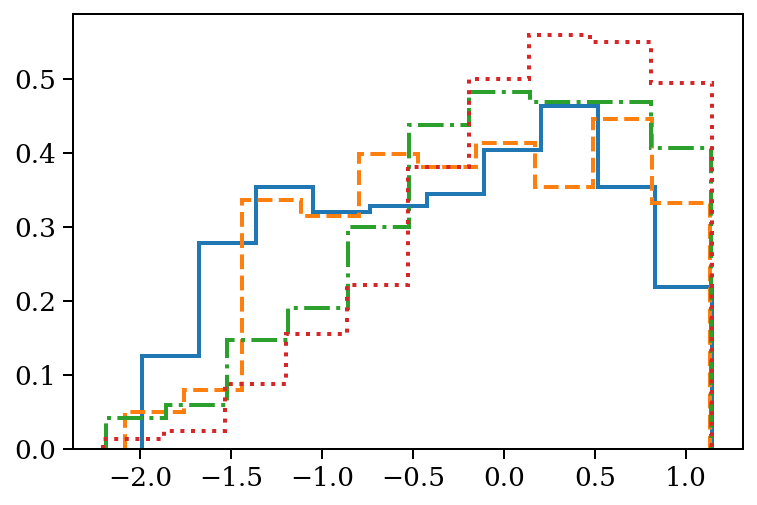

In [7]:
plt.hist(np.log10(tgw[(ncll == ncl[0])]), color = sns.color_palette()[0], linewidth = 2.0, ls = '-', label = labels[0], cumulative = False, density = True, histtype = 'step')
plt.hist(np.log10(tgw[(ncll == ncl[1])]), color = sns.color_palette()[1], linewidth = 2.0, ls = '--', label = labels[1], cumulative = False, density = True, histtype = 'step')
plt.hist(np.log10(tgw[(ncll == ncl[2])]), color = sns.color_palette()[2], linewidth = 2.0, ls = '-.', label = labels[2], cumulative = False, density = True, histtype = 'step')
plt.hist(np.log10(tgw[(ncll == ncl[3])]), color = sns.color_palette()[3], linewidth = 2.0, ls = ':', label = labels[3], cumulative = False, density = True, histtype = 'step')

plt.show()

R_dyn(z) inferred from GWTC-3, from chieff-evolution-fitting.ipynb

In [8]:
with h5py.File('GW_dynrate_z0_z1.h5', 'r') as inp:
    GW_R0_post = np.array(inp['dyn_rate_z0'])
    GW_R1_post = np.array(inp['dyn_rate_z1'])
    
with h5py.File('GW_dynrate_versus_z.h5', 'r') as inp:
    dyn_rate = np.array(inp['dyn_rate'])
    z_plot = np.array(inp['z'])
    total_rate = np.array(inp['total_rate'])

In [9]:
print('dynamics rate at $z = 0$',summary_statistics(GW_R0_post))
print('dynamics rate at $z = 1$', summary_statistics(GW_R1_post))

dynamics rate at $z = 0$ 10.9^{+16.8}_{-9.3}
dynamics rate at $z = 1$ 58.9^{+149.4}_{-46.0}


In [10]:
print('total rate at $z = 0$', summary_statistics(total_rate[:,0]))
print('total rate at $z = 1$', summary_statistics(total_rate[:,[z_plot > 1][0]]))

total rate at $z = 0$ 18.5^{+14.3}_{-7.9}
total rate at $z = 1$ 150.5^{+402.8}_{-106.8}


In [11]:
print('percentage of dynamics mergers, averaged over z', summary_statistics(100*np.median(dyn_rate/ total_rate, axis = 1)))

percentage of dynamics mergers, averaged over z 61.5^{+29.4}_{-43.6}


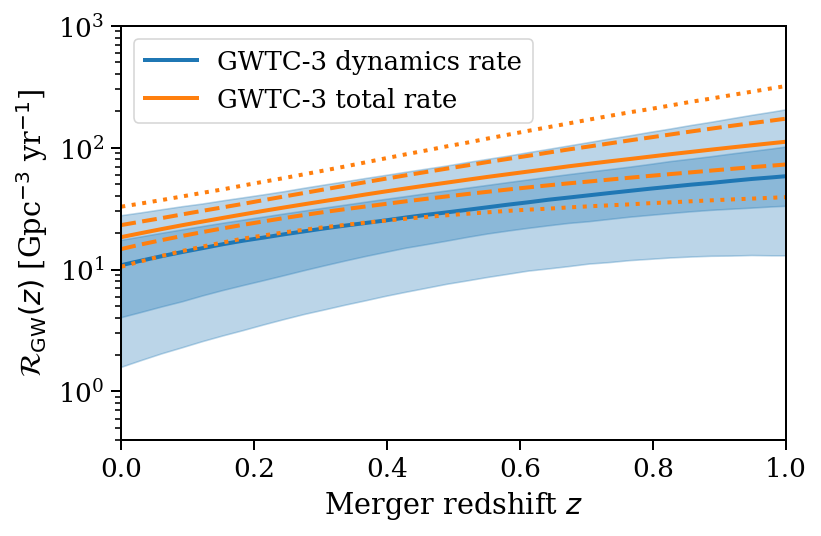

In [92]:
plt.plot(z_plot, np.percentile(dyn_rate, 50, axis = 0), label = 'GWTC-3 dynamics rate', linewidth = 2.0)
plt.fill_between(z_plot, np.percentile(dyn_rate, 5, axis = 0), np.percentile(dyn_rate, 95, axis = 0), alpha = 0.3, color = sns.color_palette()[0])
plt.fill_between(z_plot, np.percentile(dyn_rate, 25, axis = 0), np.percentile(dyn_rate, 75, axis = 0), alpha = 0.3, color = sns.color_palette()[0])

plt.plot(z_plot, np.percentile(total_rate, 50, axis = 0), label = 'GWTC-3 total rate', linewidth = 2.0, color = sns.color_palette()[1])
plt.plot(z_plot, np.percentile(total_rate, 5, axis = 0), color = sns.color_palette()[1], ls = ':', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 95, axis = 0), color = sns.color_palette()[1], ls = ':', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 25, axis = 0), color = sns.color_palette()[1], ls = '--', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 75, axis = 0), color = sns.color_palette()[1], ls = '--', linewidth = 2.0)


plt.yscale('log')
plt.ylim(4e-1,1e3)
plt.xlim(min(z_plot), 1)

plt.xlabel(r'Merger redshift $z$')
plt.ylabel(r'$\mathcal{R}_\mathrm{GW}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
plt.legend(loc = 'upper left', fontsize = 13)

plt.tight_layout()
plt.savefig('GWTC3_dynamicsrate_totalrate.pdf')
plt.savefig('GWTC3_dynamicsrate_totalrate.png')

In [89]:
def plot_cluster_rate(zmin, zmax, dz = 0.2, z_gc = 4, a = 3, b = 5, sigma_dex = 0.5, Zsun = 0.02,
                     mu_rv = 1.5, sigma_rv = 1.5, beta = -2, logMstar0 = 6.3, dNdV0 = 2.31e9,
                     logf_disrupted_cluster = 1, logMlo = 4, logMhi = 8, plot_formation = False, plot_form_kwargs = {}, plot_kwargs = {}):
    z_c = np.arange(zmin, zmax + dz, step = dz)
    R_z_c = [GC_rates.merger_rate_at_z_pop(
        GC_data, z, z_gc, a, b, dNdV0, logf_disrupted_cluster, sigma_dex, Zsun, mu_rv, sigma_rv, 
        beta, logMstar0, logMlo, logMhi) for z in z_c]
        
    plt.plot(z_c, R_z_c, **plot_kwargs)
    
    if plot_formation:
        R_z_form = [GC_rates.sfr_at_z(zi, dNdV0, z_gc, a, b, 10**logf_disrupted_cluster) for zi in z_c]
        plt.plot(z_c, np.array(R_z_form), **plot_form_kwargs)
        
    plt.xlabel(r'Redshift $z$')
    plt.xlim(zmin, zmax)
    plt.ylabel(r'$\mathcal{R}_\mathrm{dyn}(z)$ or $\mathcal{R}_\mathrm{GC}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
    plt.yscale('log')

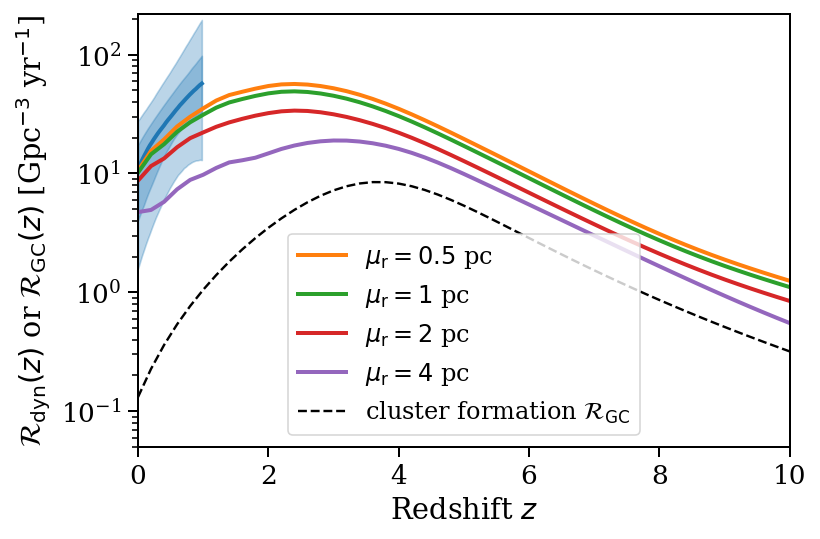

In [90]:
plt.plot(z_plot[z_plot < 1], np.percentile(dyn_rate, 50, axis = 0)[z_plot < 1], linewidth = 2.0)
plt.fill_between(z_plot[z_plot < 1], np.percentile(dyn_rate, 5, axis = 0)[z_plot < 1], np.percentile(dyn_rate, 95, axis = 0)[z_plot < 1], alpha = 0.3, color = sns.color_palette()[0])
plt.fill_between(z_plot[z_plot < 1], np.percentile(dyn_rate, 25, axis = 0)[z_plot < 1], np.percentile(dyn_rate, 75, axis = 0)[z_plot < 1], alpha = 0.3, color = sns.color_palette()[0])

plot_cluster_rate(0, 20, mu_rv = 0.5, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 0.5$ pc', color = sns.color_palette()[1], linewidth = 2))

plot_cluster_rate(0, 20, mu_rv = 1, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 1$ pc', color = sns.color_palette()[2], linewidth = 2))

plot_cluster_rate(0, 20, mu_rv = 2, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 2$ pc', color = sns.color_palette()[3], linewidth = 2))

plot_cluster_rate(0, 20, mu_rv = 4, sigma_rv = 1, plot_formation = True, plot_form_kwargs = dict(label = r'cluster formation $\mathcal{R}_\mathrm{GC}$', ls = '--', c = 'k'), plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 4$ pc', linewidth = 2, color = sns.color_palette()[4]))

plt.xlim(0,10)
plt.ylim(5e-2,2.2e2)

plt.legend(loc = 'lower center', fontsize = 12)
#~10 mergers per cluster for clusters in this mass range

plt.tight_layout()
plt.savefig('GWTC3_dynamicsrate_with_GCpred_mu-r.pdf')
plt.savefig('GWTC3_dynamicsrate_with_GCpred_mu-r.png')

### Inference of cluster properties

starting with formation rate

In [15]:
sigma_dex = 0.5 #spread in metallicity distribution at each redshift
Zsun = 0.02 #solar metallicity
logMlo = 4 #minimum GC mass is 10^4 Msun
logMhi = 8 #maximum GC mass is 10^8 Msun
dNdV0 = 2.31e9 #number density of evolved clusters *today* in Gpc^-3

samples = {}
with h5py.File('GC_properties_fixedmassdist.h5', 'r') as inp:
    for n in inp.keys():
        samples[n] = np.array(inp[n])
        
prior = {}
with h5py.File('GC_properties_prior.h5', 'r') as inp:
    for n in inp.keys():
        prior[n] = np.array(inp[n])

In [16]:
samples.keys(), prior.keys()

(dict_keys(['a', 'b', 'beta', 'logMstar0', 'logf_disrupted_cluster', 'mu_rv', 'sigma_rv', 'z_gc']),
 dict_keys(['a', 'b', 'beta', 'logMstar0', 'logf_disrupted_cluster', 'mu_rv', 'sigma_rv', 'z_gc']))

In [17]:
print('disrupted factor:', summary_statistics(10**samples['logf_disrupted_cluster']))

disrupted factor: 22.6^{+29.9}_{-16.2}


In [18]:
nsamps = 8000 #store nsamps posterior draws

zs = np.linspace(0, 20, 50) #redshift grid

Rgc_z = np.zeros((len(zs), nsamps)) #to store posterior draws of formation rate density of globular clusters as a function of redshift
Rgc_z2 = np.zeros(nsamps)
Rgc_z3 = np.zeros(nsamps)

Rgc_z_prior = np.zeros((len(zs), nsamps)) #to store prior draws of formation rate density of globular clusters as a function of redshift



for j, i in enumerate(np.random.choice(len(samples['z_gc']), size = nsamps, replace = False)):
    Rgc_z[:, j] = np.array([GC_rates.sfr_at_z(zi, dNdV0, samples['z_gc'][i], samples['a'][i], samples['b'][i], 10**samples['logf_disrupted_cluster'][i]) for zi in zs])
    Rgc_z2[j] = GC_rates.sfr_at_z(2, dNdV0, samples['z_gc'][i], samples['a'][i], samples['b'][i], 10**samples['logf_disrupted_cluster'][i]) 
    Rgc_z3[j] = GC_rates.sfr_at_z(3, dNdV0, samples['z_gc'][i], samples['a'][i], samples['b'][i], 10**samples['logf_disrupted_cluster'][i]) 
    
    Rgc_z_prior[:, j] = np.array([GC_rates.sfr_at_z(zi, dNdV0, prior['z_gc'][i], prior['a'][i], prior['b'][i], 10**prior['logf_disrupted_cluster'][i]) for zi in zs])

In [24]:
print('GC formation rate at z = 3:', summary_statistics(Rgc_z3))
print('GC formation rate at z = 2:', summary_statistics(Rgc_z2))
print('GC formation mass density at z = 2:', summary_statistics(Rgc_z2 * average_cluster_mass/1e6))

GC formation rate at z = 3: 8.9^{+17.5}_{-7.5}
GC formation rate at z = 2: 5.0^{+9.4}_{-4.0}
GC formation mass density at z = 2: 2.1^{+3.9}_{-1.7}


In [20]:
print('GC formation rate increase between z = 0 and z = 3:', summary_statistics(Rgc_z3/Rgc_z[0,:]))
MF_SFR_slope = GC_rates.sfr_at_z(3, 1, 2.2, 2.6, 6.2-2.6, 1)/ GC_rates.sfr_at_z(0, 1, 2.2, 2.6, 6.2-2.6, 1)
print('Madau-Fragos SFR increase between z = 0 and z = 3:', MF_SFR_slope)
print('GC formation rate increases between z = 0 and z = 3 faster than the SFR at credibility:', 100 - np.interp(MF_SFR_slope, np.percentile(Rgc_z3/Rgc_z[0,:], np.linspace(0,100,100)), np.linspace(0, 100, 100)))

GC formation rate increase between z = 0 and z = 3: 49.0^{+633.5}_{-46.6}
Madau-Fragos SFR increase between z = 0 and z = 3: 7.3736143
GC formation rate increases between z = 0 and z = 3 faster than the SFR at credibility: 82.19259434909738


In [33]:
help(GC_rates.sfr_at_z)

Help on function sfr_at_z in module GC_rates:

sfr_at_z(z, dNdV0=2310000000.0, z_gc=4.5, a=2.5, b=2.5, disrupted_factor=1.0)
    cluster star formation history (e.g. Fig 5 in Rodriguez & Loeb 2018)
    Assume it is Madau-like with params z_gc, a, b
    z_gc: peak redshift
    a: low redshift power-law slope in (1 + z)
    b: high redshift power-law slope slope in (1 + z)
    dNdV0: number density in comoving Gpc^-3 at z = 0, found by integrating the sfr dN/dVdt over all t. Kremer+ 2020 assumes volumetric number density of 2.31e9 Gpc^-3. In terms of mass density, would be typical cluster mass * 2.31e9 Gpc^-3 yr^-1 or ~5e5 Msun Mpc^-3 yr^-1. If mass density is better known than number density, replace this with dM/dV and then divide by typical cluster mass according to assumed mass distribution.
    disrupted_factor: accounts for contribution from clusters that were disrupted/ evaporated before the present day, which has the same effect as adjusting the cluster number density 
    return

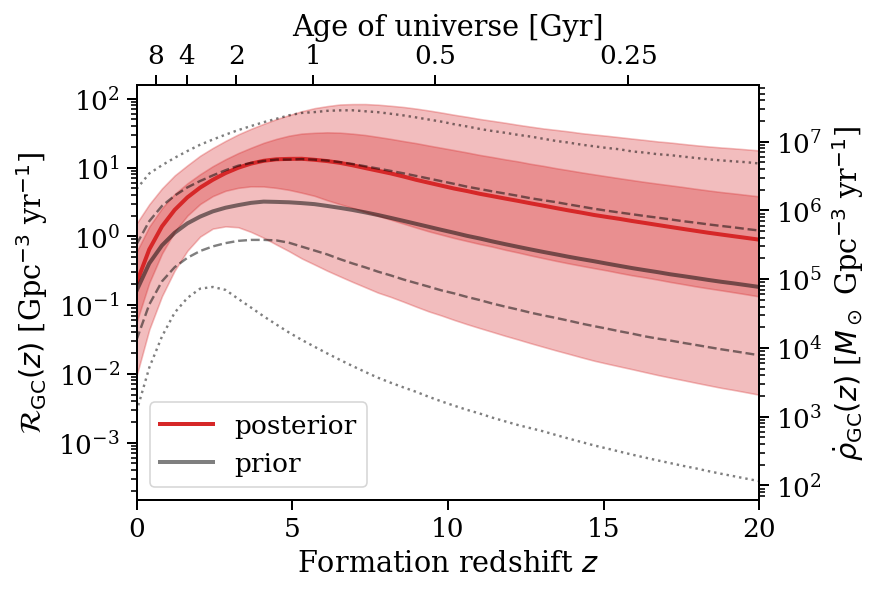

In [91]:
fig, ax = plt.subplots(constrained_layout=True)

#ax.plot(zs, np.percentile(Rgc_z, 50, axis = -1), color = sns.color_palette()[3], label = r'Inferred $\mathcal{R}_\mathrm{GC}$', linewidth = 2.0)

ax.plot(zs, np.percentile(Rgc_z, 50, axis = -1), color = sns.color_palette()[3], label = 'posterior', linewidth = 2.0)
ax.fill_between(zs, np.percentile(Rgc_z, 5, axis = -1), np.percentile(Rgc_z, 95, axis = -1), alpha = 0.3, color = sns.color_palette()[3])
ax.fill_between(zs, np.percentile(Rgc_z, 25, axis = -1), np.percentile(Rgc_z, 75, axis = -1), alpha = 0.3, color = sns.color_palette()[3])

ax.plot(zs, np.percentile(Rgc_z_prior, 50, axis = -1), alpha = 0.5, color = 'k', linewidth = 2.0, ls = '-', label = 'prior')
ax.plot(zs, np.percentile(Rgc_z_prior, 5, axis = -1), alpha = 0.5, color = 'k', ls = ':')
ax.plot(zs, np.percentile(Rgc_z_prior, 95, axis = -1), alpha = 0.5, color = 'k', ls = ':')
ax.plot(zs, np.percentile(Rgc_z_prior, 25, axis = -1), alpha = 0.5, color = 'k', ls = '--')
ax.plot(zs, np.percentile(Rgc_z_prior, 75, axis = -1), alpha = 0.5,  color = 'k', ls = '--')

#ax.plot(zs, GC_rates.sfr_at_z(zs, dNdV0, 2.2, 2.6, 6.2-2.6, 20), label = 'Madau-Fragos SFR', linewidth = 2.0, ls = '--', color = sns.color_palette()[0])


ax.set_xlabel(r'Formation redshift $z$')
ax.set_ylabel(r'$\mathcal{R}_\mathrm{GC}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')

ax.set_xlim(min(zs), max(zs))
ax.set_yscale('log')

from astropy.cosmology import Planck15
from astropy import units as u
ages = Planck15.age(zs).to(u.Gyr).value
def ztoage(z):
    return np.interp(z, zs, ages)
def agetoz(t):
    return np.interp(t, ages[::-1], zs[::-1])

average_cluster_mass = GC_rates.average_mass_schechter(beta = samples['beta'][0], logMstar0 = samples['logMstar0'][0], logMlo = logMlo, logMhi = logMhi, res = 100)
def rate_to_mass(rate):
    return rate * average_cluster_mass

def mass_to_rate(mass):
    return mass / average_cluster_mass

timeax = ax.secondary_xaxis('top', functions=(ztoage, agetoz))
timeax.set_xticks(ticks = [0.25, 0.5, 1, 2, 4, 8], labels = ['0.25', '0.5', '1', '2', '4', '8'])
timeax.set_xlabel('Age of universe [Gyr]')

massax = ax.secondary_yaxis('right', functions = (rate_to_mass, mass_to_rate))
massax.set_ylabel(r'$\dot{\rho}_\mathrm{GC}(z)$ [$M_\odot$ Gpc$^{-3}$ yr$^{-1}$]')

plt.legend(loc = 'lower left')

plt.savefig('GCformation_numberdensity_vsredshift_posterior_prior.pdf')
plt.savefig('GCformation_numberdensity_vsredshift_posterior_prior.png')

In [30]:
print('average log10 cluster mass is:', np.log10(average_cluster_mass))

average log10 cluster mass is: 5.623343


In [31]:
print('GC formation mass density at z = 2 (units of $10^6$ solar masses):', summary_statistics(Rgc_z2 * average_cluster_mass/1e6))



GC formation mass density at z = 2 (units of $10^6$ solar masses): 2.1^{+3.9}_{-1.7}


now the radius distribution

In [50]:
nsamps = 8000

rs = np.array([0.5, 1, 2, 4]) #radius grid, same as grid of GC models
dr_grid = np.array([0.5, 0.5, 1, 2]) #dr, assuming first "bin" starts at 0 (for plotting purposes)

p_radius = np.zeros((len(rs), nsamps)) #to store posterior draws of pdf(radius)

dNdVdTdR_z2 = np.zeros_like(p_radius) #to store posterior draws of (GC formation density at z = 2) * p(R)

rand_ind = np.random.choice(len(samples['z_gc']), size = nsamps, replace = False)

for j, i in enumerate(rand_ind):
    
    p_radius[:, j] = np.array([GC_rates.radius_weights(r, samples['mu_rv'][i], samples['sigma_rv'][i]) for r in rs])/dr_grid
    
    dNdVdT_z2 = GC_rates.sfr_at_z(2, dNdV0, samples['z_gc'][i], samples['a'][i], samples['b'][i], 10**samples['logf_disrupted_cluster'][i])
    dNdVdTdR_z2[:, j] = p_radius[:, j] * dNdVdT_z2

(0.0, 0.6)

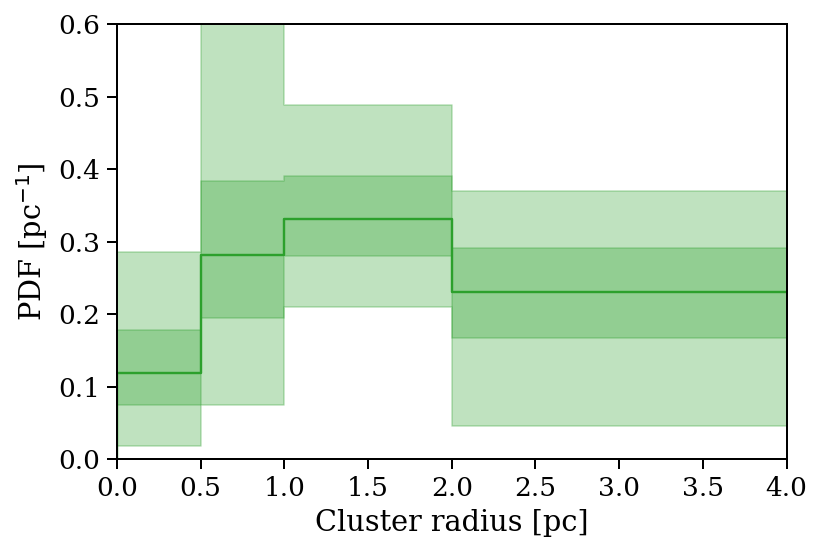

In [51]:
plt.step(np.append(0, rs), np.append(0, np.percentile(p_radius, 50, axis = -1)), color = sns.color_palette()[2], where = 'pre')
plt.fill_between(np.append(0, rs), np.append(0, np.percentile(p_radius, 5, axis = -1)), np.append(0, np.percentile(p_radius, 95, axis = -1)), alpha = 0.3, step = 'pre', color = sns.color_palette()[2])
plt.fill_between(np.append(0, rs), np.append(0, np.percentile(p_radius, 25, axis = -1)), np.append(0, np.percentile(p_radius, 75, axis = -1)), alpha = 0.3, step = 'pre', color = sns.color_palette()[2])

plt.xlabel('Cluster radius [pc]')
plt.ylabel(r'PDF [pc$^{-1}$]')

plt.xlim(0, 4)
plt.ylim(0,0.6)

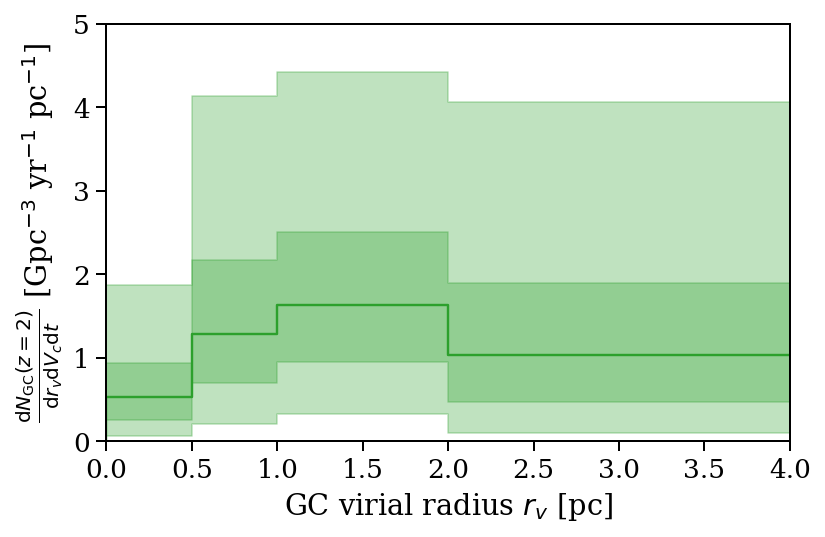

In [52]:
plt.step(np.append(0, rs), np.append(0, np.percentile(dNdVdTdR_z2, 50, axis = -1)), color = sns.color_palette()[2], where = 'pre')
plt.fill_between(np.append(0, rs), np.append(0, np.percentile(dNdVdTdR_z2, 5, axis = -1)), np.append(0, np.percentile(dNdVdTdR_z2, 95, axis = -1)), alpha = 0.3, step = 'pre', color = sns.color_palette()[2])
plt.fill_between(np.append(0, rs), np.append(0, np.percentile(dNdVdTdR_z2, 25, axis = -1)), np.append(0, np.percentile(dNdVdTdR_z2, 75, axis = -1)), alpha = 0.3, step = 'pre', color = sns.color_palette()[2])

plt.xlabel(r'GC virial radius $r_v$ [pc]')
plt.ylabel(r'$\frac{\mathrm{d}N_\mathrm{GC}(z = 2)}{\mathrm{d}r_v \mathrm{d}V_c \mathrm{d}t}$ [Gpc$^{-3}$ yr$^{-1}$ pc$^{-1}$]')

plt.xlim(0, 4)
plt.ylim(0,5)

plt.tight_layout()
plt.savefig('GCradius_distribution_posterior.pdf')
plt.savefig('GCradius_distribution_posterior.png')

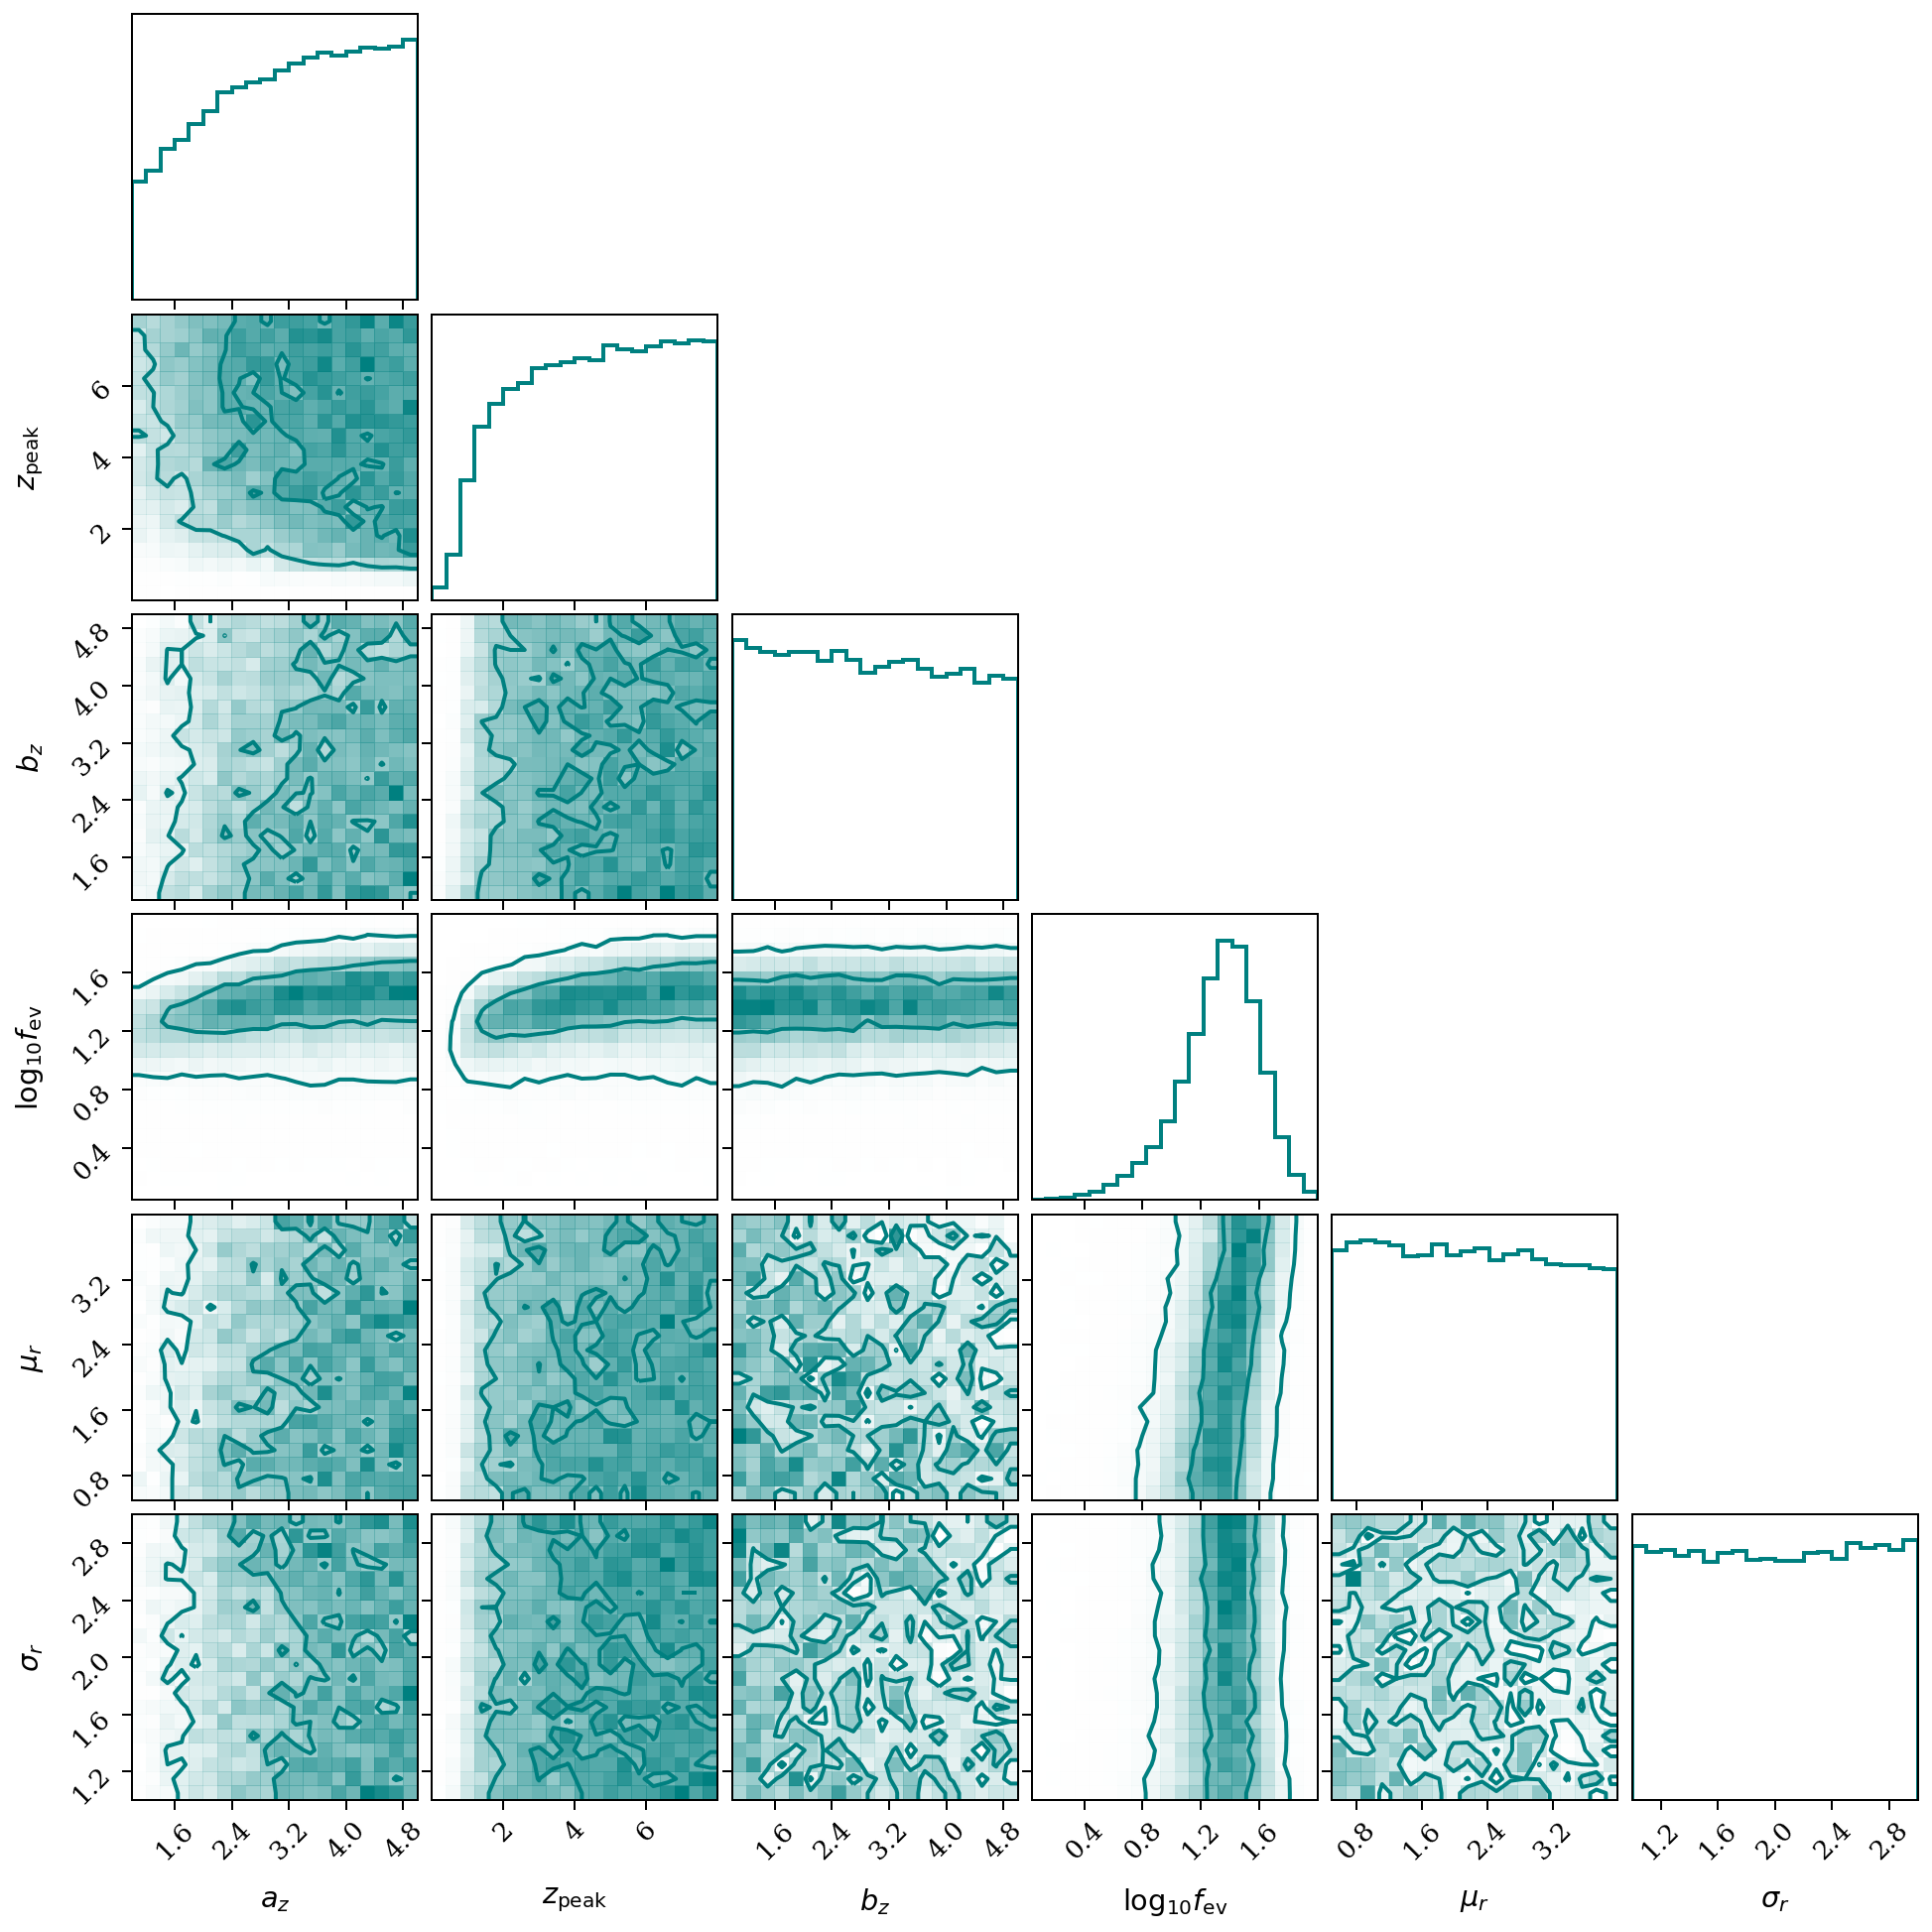

In [53]:
corner.corner(samples, var_names = ['a', 'z_gc', 'b', 'logf_disrupted_cluster', 'mu_rv', 'sigma_rv'], labels = 
             ['$a_z$', '$z_\mathrm{peak}$', '$b_z$', '$\log_{10} f_\mathrm{ev}$', '$\mu_r$', '$\sigma_r$'],
             levels = [0.5, 0.9], plot_datapoints = False, color = 'teal', contour_kwargs = {'linewidths': 2.0},  hist_kwargs = {'linewidth': 2.0});

plt.savefig('GCparams_corner_fixedmassdist.pdf')
plt.savefig('GCparams_corner_fixedmassdist.png')

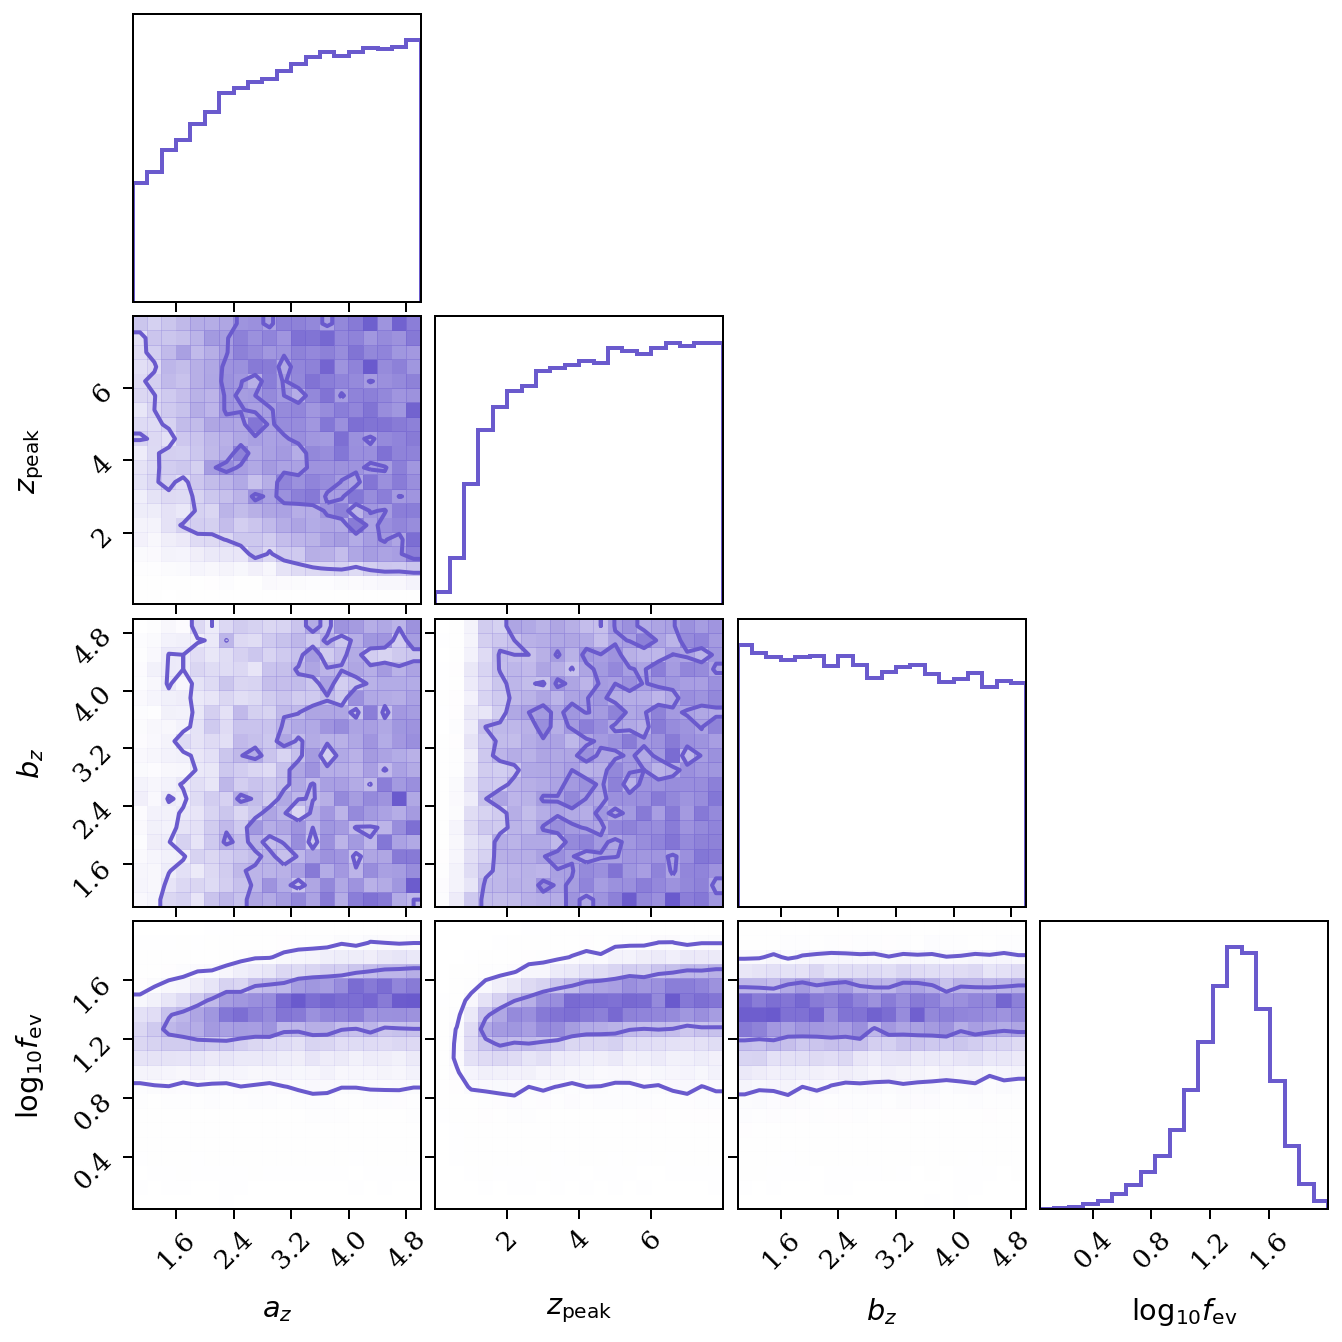

In [54]:
corner.corner(samples, var_names = ['a', 'z_gc', 'b', 'logf_disrupted_cluster'], labels = 
             ['$a_z$', '$z_\mathrm{peak}$', '$b_z$', '$\log_{10} f_\mathrm{ev}$'],
             levels = [0.5, 0.9], plot_datapoints = False, color = 'slateblue', contour_kwargs = {'linewidths': 2.0},  hist_kwargs = {'linewidth': 2.0});

plt.savefig('GCparams_corner_fixedmassdist_onlyredshift.pdf')

now the corner plot for the version with the radius distribution fixed, fitting for cluster mass distribution

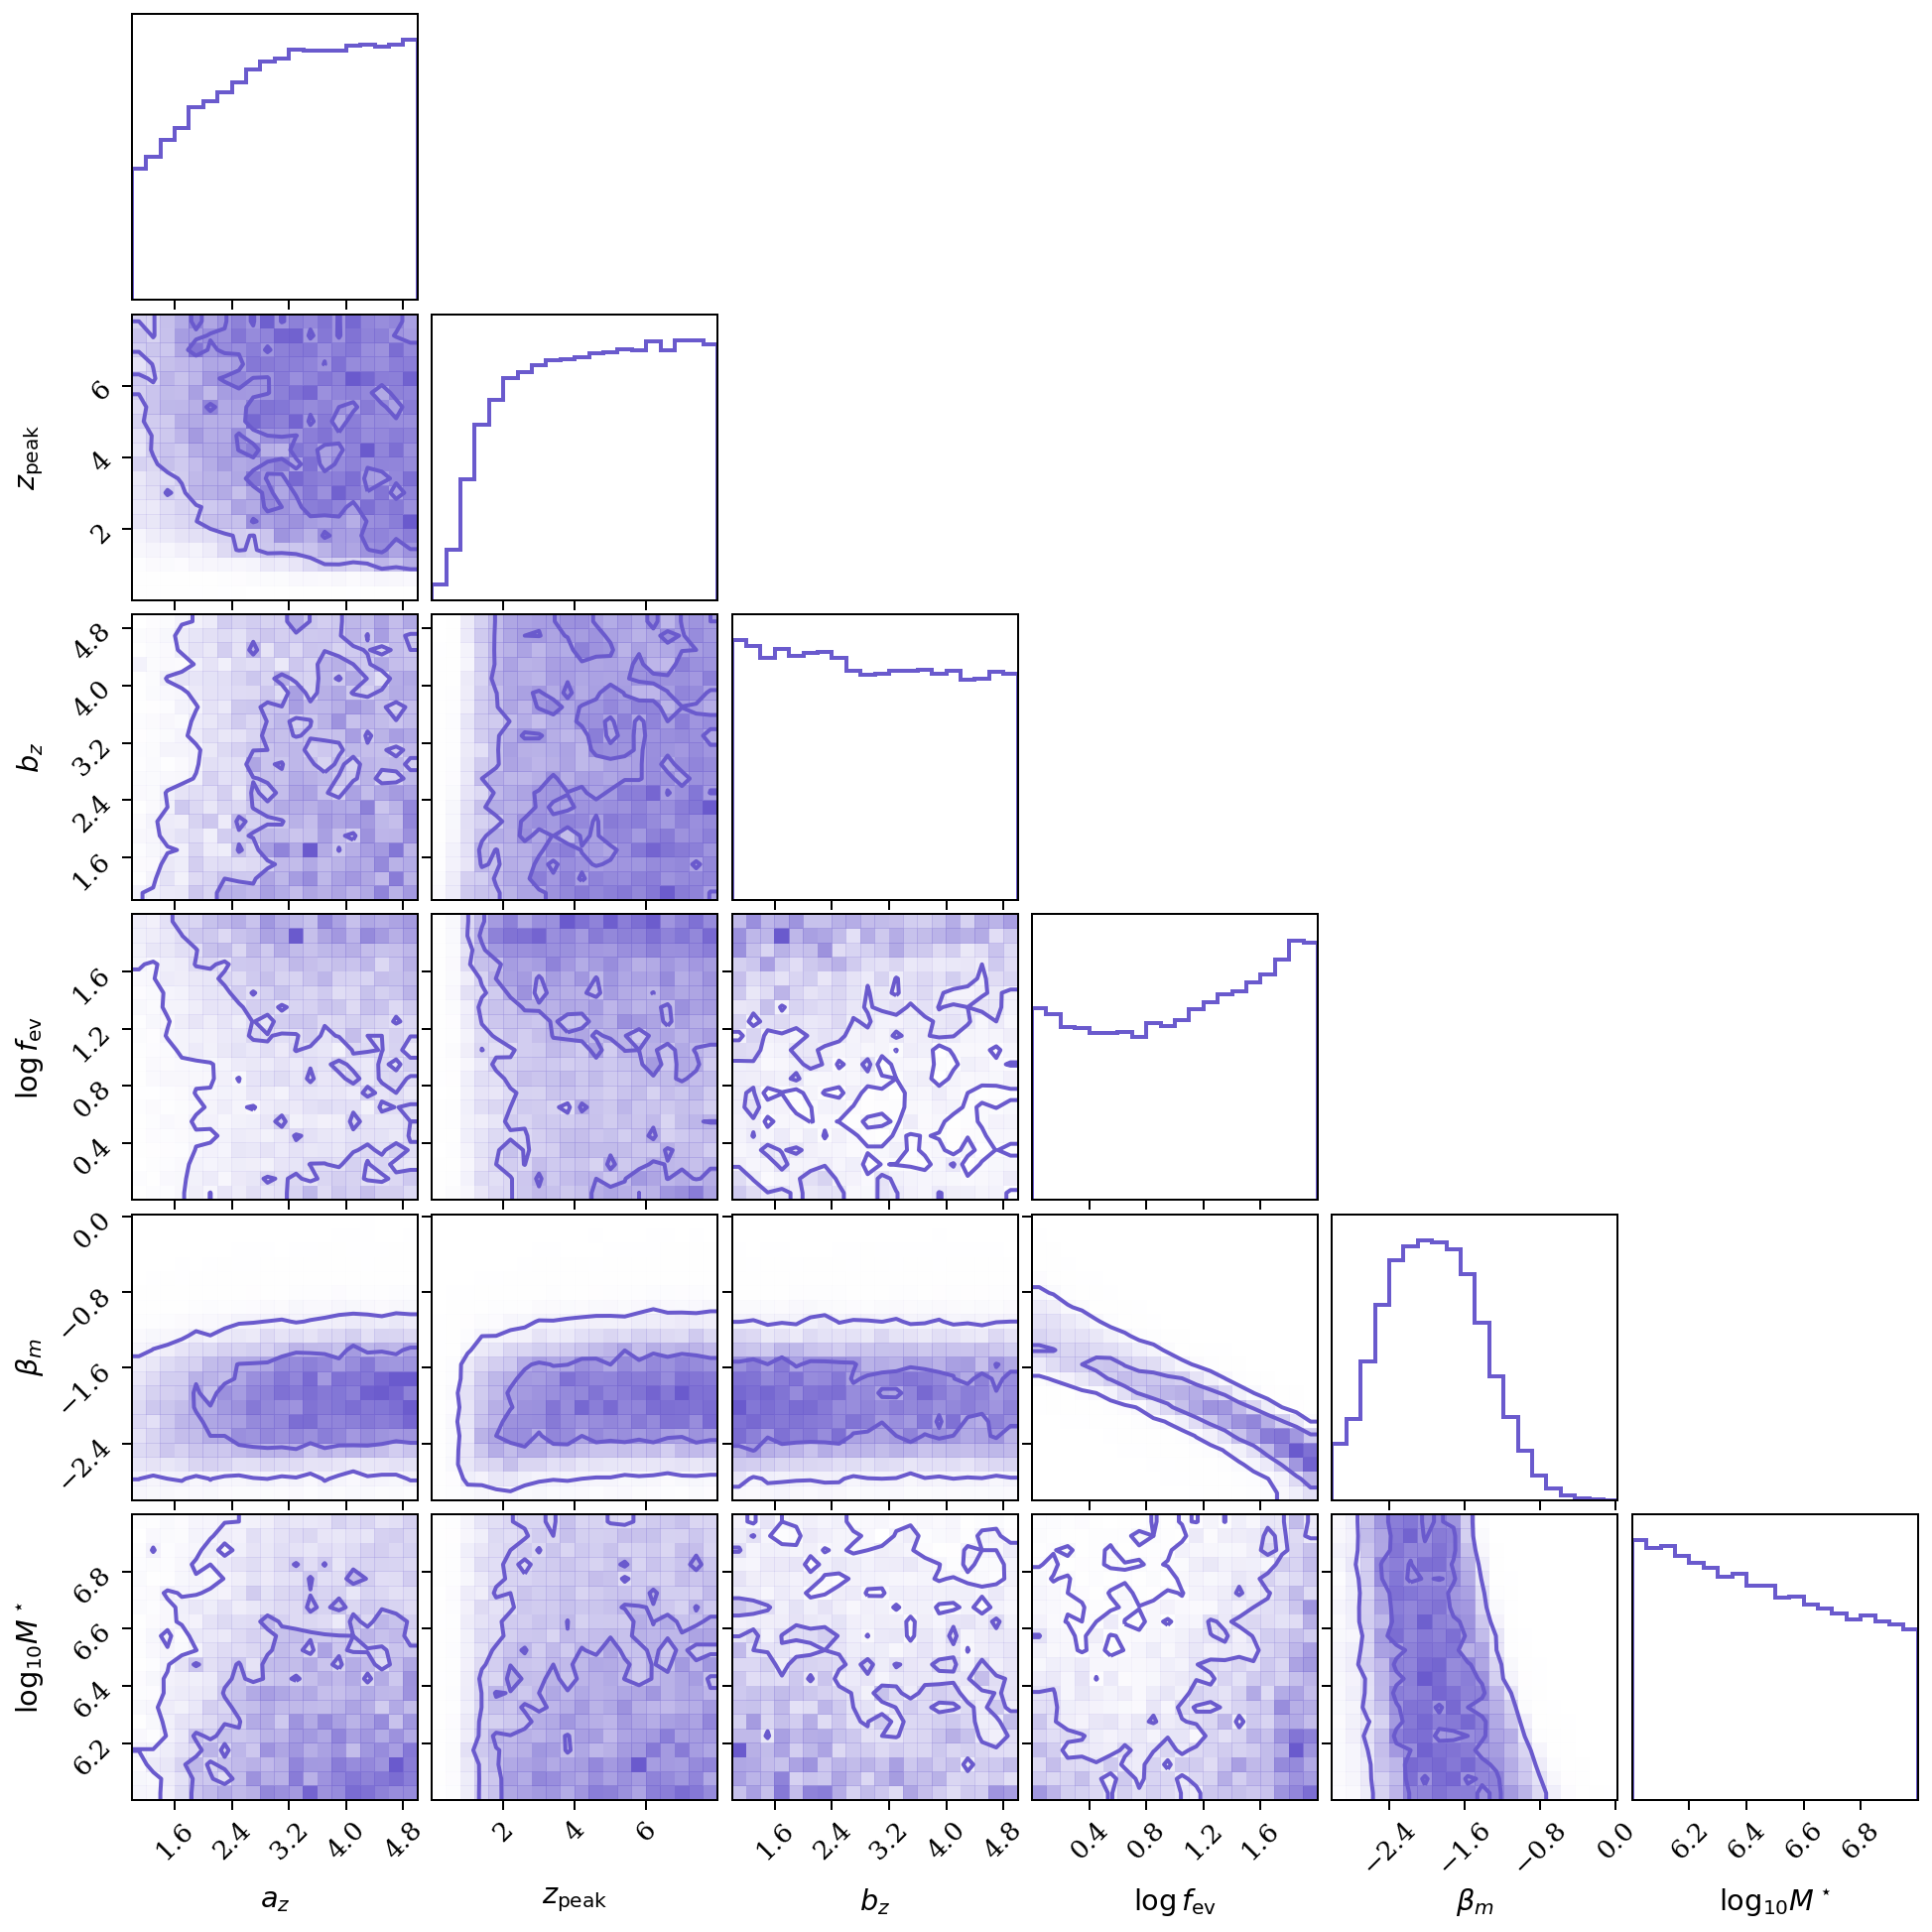

In [55]:
samples_fixedradiusdist = {}
with h5py.File('GC_properties_fixedradiusdist.h5', 'r') as inp:
    for n in inp.keys():
        samples_fixedradiusdist[n] = np.array(inp[n])

corner.corner(samples_fixedradiusdist, var_names = ['a', 'z_gc', 'b', 'logf_disrupted_cluster', 'beta', 'logMstar0'], 
             labels = [r'$a_z$', r'$z_\mathrm{peak}$', r'$b_z$', r'$\log f_\mathrm{ev}$', r'$\beta_m$', r'$\log_{10} M^\star$'],
              levels = [0.5, 0.9], plot_datapoints = False, color = 'slateblue', contour_kwargs = {'linewidths': 2.0}, hist_kwargs = {'linewidth': 2.0});

plt.savefig('GCparams_corner_fixedradiusdist.pdf')
plt.savefig('GCparams_corner_fixedradiusdist.png')

In [56]:
print(r'$\beta_m =', summary_statistics(samples_fixedradiusdist['beta']), '$')

$\beta_m = -1.9^{+0.8}_{-0.8} $


In [57]:
print(r'$\log_{10}M^\star = ', summary_statistics(samples_fixedradiusdist['logMstar0']), '$')

$\log_{10}M^\star =  6.4^{+0.5}_{-0.4} $


Plot the inferred mass distribution

In [58]:
nsamps = 8000

logms_model = np.log10(np.array([2e5, 4e5, 8e5, 1.6e6]) * 0.6) #log10mass grid of GC models
dlogm_model = np.diff(logms_model)[0]

logms_total = np.linspace(4,8,200)

p_logmass = np.zeros((len(logms_total), nsamps)) #to store posterior draws of pdf(log10mass)

p_logmass_model = np.zeros((len(logms_model), nsamps))


dNdVdTdlogm_z2 = np.zeros_like(p_logmass) #to store posterior draws of (GC formation density at z = 2) * p(log10mass)

dNdVdTdlogm_z2_model = np.zeros_like(p_logmass_model)


rand_ind = np.random.choice(len(samples['z_gc']), size = nsamps, replace = False)

for j, i in enumerate(rand_ind):
    
    x = 10**(logms_total - samples_fixedradiusdist['logMstar0'][i])
    p_logmass[:, j] = x**(samples_fixedradiusdist['beta'][i] + 1) * np.exp(-x)
    norm = np.trapz(p_logmass[: , j], logms_total)
    p_logmass[:, j] /= norm
    
    x_model = 10**(logms_model - samples_fixedradiusdist['logMstar0'][i])
    p_logmass_model[:,j] = x_model**(samples_fixedradiusdist['beta'][i] + 1) * np.exp(-x_model)
    p_logmass_model[:,j] /= norm
    
    dNdVdT_z2 = GC_rates.sfr_at_z(2, dNdV0, samples_fixedradiusdist['z_gc'][i], samples_fixedradiusdist['a'][i], samples_fixedradiusdist['b'][i], 10**samples_fixedradiusdist['logf_disrupted_cluster'][i])
    dNdVdTdlogm_z2[:, j] = p_logmass[:, j] * dNdVdT_z2
    dNdVdTdlogm_z2_model[:, j] = p_logmass_model[:,j] * dNdVdT_z2

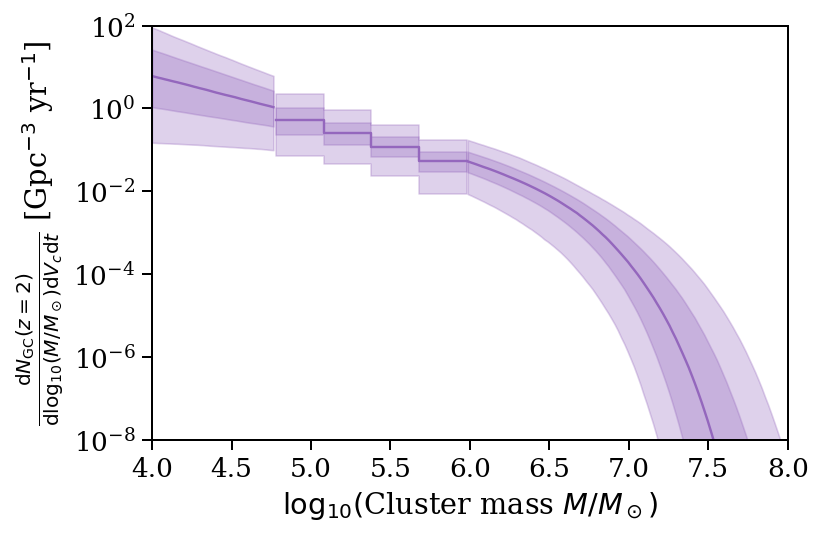

In [59]:
c = sns.color_palette()[4]

logms_model_plot = np.append(logms_model[0] - dlogm_model, logms_model)
plt.step(logms_model_plot, np.append(np.median(dNdVdTdlogm_z2_model, axis = -1)[0], np.median(dNdVdTdlogm_z2_model, axis = -1)), color = c, where = 'pre')
plt.fill_between(logms_model_plot, np.append(np.percentile(dNdVdTdlogm_z2_model, 5, axis = -1)[0], np.percentile(dNdVdTdlogm_z2_model, 5, axis = -1)),
                np.append(np.percentile(dNdVdTdlogm_z2_model, 95, axis = -1)[0], np.percentile(dNdVdTdlogm_z2_model, 95, axis = -1)),
                alpha = 0.3, step = 'pre', color = c)
plt.fill_between(logms_model_plot, np.append(np.percentile(dNdVdTdlogm_z2_model, 25, axis = -1)[0], np.percentile(dNdVdTdlogm_z2_model, 25, axis = -1)),
                np.append(np.percentile(dNdVdTdlogm_z2_model, 75, axis = -1)[0], np.percentile(dNdVdTdlogm_z2_model, 75, axis = -1)),
                alpha = 0.3, step = 'pre', color = c)

sel1 = (logms_total < logms_model_plot[0])
plt.plot(logms_total[sel1] , np.median(dNdVdTdlogm_z2, axis = -1)[sel1], color = c)
plt.fill_between(logms_total[sel1], np.percentile(dNdVdTdlogm_z2, 5, axis = -1)[sel1], np.percentile(dNdVdTdlogm_z2, 95, axis = -1)[sel1], alpha = 0.3, color = c)
plt.fill_between(logms_total[sel1], np.percentile(dNdVdTdlogm_z2, 25, axis = -1)[sel1], np.percentile(dNdVdTdlogm_z2, 75, axis = -1)[sel1], alpha = 0.3, color = c)


sel2 = (logms_total > logms_model_plot[-1])
plt.plot(logms_total[sel2] , np.median(dNdVdTdlogm_z2, axis = -1)[sel2], color = c)
plt.fill_between(logms_total[sel2], np.percentile(dNdVdTdlogm_z2, 5, axis = -1)[sel2], np.percentile(dNdVdTdlogm_z2, 95, axis = -1)[sel2], alpha = 0.3, color = c)
plt.fill_between(logms_total[sel2], np.percentile(dNdVdTdlogm_z2, 25, axis = -1)[sel2], np.percentile(dNdVdTdlogm_z2, 75, axis = -1)[sel2], alpha = 0.3, color = c)

plt.yscale('log')
plt.ylim(1e-8,100)
plt.xlim(4,8)

plt.xlabel(r'$\log_{10}($Cluster mass $M / M_\odot)$')
plt.ylabel(r'$\frac{\mathrm{d}{N}_\mathrm{GC} (z = 2)}{\mathrm{d}\log_{10}(M / M_\odot)\mathrm{d}V_c\mathrm{d}t}$ [Gpc$^{-3}$ yr$^{-1}$]')

plt.tight_layout()
plt.savefig('GCmass_distribution_posterior.pdf')
plt.savefig('GCmass_distribution_posterior.png')

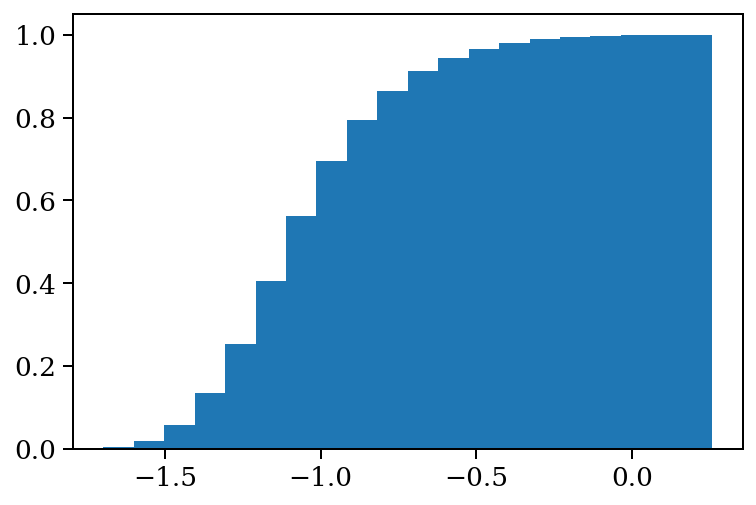

8.9^{+22.5}_{-5.0}
11.3^{+14.9}_{-8.1}


In [80]:
plt.hist(np.log10(2) - samples['logf_disrupted_cluster'],cumulative = True, density = True, bins = 20)
plt.show()
print(summary_statistics(100*10**(np.log10(2) - samples['logf_disrupted_cluster'])))
print(summary_statistics(10**-(np.log10(2) - samples['logf_disrupted_cluster'])))

In [77]:
np.percentile(np.log10(2) - samples['logf_disrupted_cluster'],99.8)

-0.02491018426418274